## Connect and Retrieve Data From Database

In [2]:
# create a connection to the database
import pandas as pd
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine, text
from urllib.parse import quote as urlquote

load_dotenv()
encoded_password = urlquote(os.getenv('DB_PASSWORD'))
db_config = {
    'host': os.getenv('DB_HOST'),
    'user': os.getenv('DB_USER'),
    'password': encoded_password,
    'port': os.getenv('DB_PORT'),
    'database': os.getenv('DB_NAME')
}

# Create Database Connection
def create_db_connection():
    try:
        db_url = f"mysql+pymysql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
        engine = create_engine(db_url)
        return engine
    except Exception as err:
        print(f"Error connecting to database: {err}")
        return None
    
# retrieve data from database and return a pandas dataframe

def retrieve_data_from_database(query):
    try:
        # Create Database Connection
        engine = create_db_connection()
        if engine is None:
            print("Failed to connect to database")
            return None
        
        # Execute the query and convert to DataFrame
        with engine.connect() as conn:
            result = conn.execute(text(query))
            # Get column names from the keys
            columns = result.keys()
            # Fetch all data and create DataFrame
            data = result.fetchall()
            return pd.DataFrame(data, columns=columns)
            
    except Exception as err:
        print(f"Error retrieving data from database: {err}")
        return None

# Test the connection and query
df = retrieve_data_from_database("SELECT * FROM en_sol_catboost_rule_based_result")

In [3]:
df

,ds,_D0006810__프레스_속도_PV__32bit_integer_,_D0006814__언와인더_장력_PV__32bit_integer_,_D0006816__강제연신기_장력_PV__32bit_integer_,_D0006818__리와인더_장력_PV__32bit_integer_,_D0006860__구동부측_GAP__32bit_integer_,_D0006862__작업자측_GAP__32bit_integer_,_D0006864__구동부측_이전_GAP__32bit_integer_,_D0006866__작업자측_이전_GAP__32bit_integer_,_D0006894__구동부측_역압__32bit_integer_,...,리와인더장력차이,강제연신기장력차이,유도가열온도DS차이,유도가열온도WS차이,파단직전,error_index,data_index,Rule_Triggered_Features,룰베이스,catboost_파단확률
0,2025-01-16 15:29:55,51,155,512,254,592,627,601,637,72,...,6,-12,-2,3,0,1,0,"['[D0006810] 프레스 속도 PV [32bit integer]', '[D00...",파단위험,0.002417135853087
1,2025-01-16 15:29:55,52,155,498,254,592,627,601,637,72,...,6,2,-2,3,0,1,1,"['[D0006810] 프레스 속도 PV [32bit integer]', '[D00...",파단위험,0.0014362313979861
2,2025-01-16 15:29:55,53,155,498,254,592,627,601,637,72,...,6,2,-2,3,0,1,2,"['[D0006810] 프레스 속도 PV [32bit integer]', '[D00...",파단위험,0.0014362313979861
3,2025-01-16 15:29:55,53,155,498,254,592,627,601,637,72,...,6,2,-7,3,0,1,3,"['[D0006810] 프레스 속도 PV [32bit integer]', '[D00...",파단위험,0.0014362313979861
4,2025-01-16 15:29:55,54,155,498,254,592,627,601,637,72,...,6,2,-7,2,0,1,4,"['[D0006810] 프레스 속도 PV [32bit integer]', '[D00...",파단위험,0.0014362313979861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850370,2025-01-21 02:56:45,60,164,497,245,597,648,597,648,62,...,15,3,-1,1,1,22,2850370,[],정상,0.9636804640223132
2850371,2025-01-21 02:56:45,60,161,497,256,597,648,597,648,62,...,4,3,-1,1,1,22,2850371,[],정상,0.9622482797685216
2850372,2025-01-21 02:56:45,60,161,507,256,597,648,597,648,62,...,4,-7,1,1,1,22,2850372,[],정상,0.9450916993236256
2850373,2025-01-21 02:56:45,60,161,507,256,597,648,597,648,62,...,4,-7,1,0,1,22,2850373,[],정상,0.9557126181507526


In [4]:
df['룰베이스'].value_counts()

룰베이스
정상      2284139
파단위험     417045
파단경고     149191
Name: count, dtype: int64

In [9]:
df['파단직전'].value_counts()

파단직전
0    2849826
1        549
Name: count, dtype: int64

In [10]:
df.columns


Index(['ds', '_D0006810__프레스_속도_PV__32bit_integer_',
       '_D0006814__언와인더_장력_PV__32bit_integer_',
       '_D0006816__강제연신기_장력_PV__32bit_integer_',
       '_D0006818__리와인더_장력_PV__32bit_integer_',
       '_D0006860__구동부측_GAP__32bit_integer_',
       '_D0006862__작업자측_GAP__32bit_integer_',
       '_D0006864__구동부측_이전_GAP__32bit_integer_',
       '_D0006866__작업자측_이전_GAP__32bit_integer_',
       '_D0006894__구동부측_역압__32bit_integer_',
       '_D0006896__작업자측_역압__32bit_integer_',
       '_D0006926__언와인더_댄서_위치.__16bit_integer_',
       '_D0006934__리와인더_댄서_위치.__16bit_integer_',
       '_D0006936__연신기_댄서_위치.__32bit_integer_',
       '_M005495__언와인더_E.P.C_중앙__Bit_', '_M005680__리와인더_E.P.C_좌_5__Bit_',
       '_M005681__리와인더_E.P.C_좌_4__Bit_', '_M005682__리와인더_E.P.C_좌_3__Bit_',
       '_M005683__리와인더_E.P.C_좌_2__Bit_', '_M005684__리와인더_E.P.C_좌_1__Bit_',
       '_M005685__리와인더_E.P.C_중앙__Bit_', '_M005686__리와인더_E.P.C_우_1__Bit_',
       '프레스속도차이', '언와인더장력차이', '리와인더장력차이', '강제연신기장력차이', '유도가열온도DS차이',
       '유

C:\Users\sakso\AppData\Local\Temp\ipykernel_21180\490691262.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rule_counts.index, y=rule_counts.values, palette='viridis')


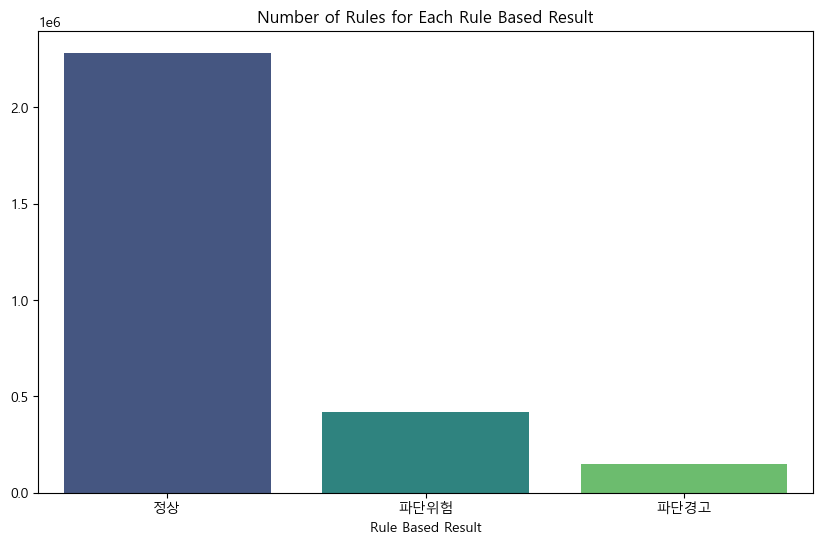

In [ ]:
## I want to visualize the rule based result
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import seaborn as sns

# Set up Korean font
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# Count the number of rules for each rule based result
rule_counts = df['룰베이스'].value_counts()

# Create a bar plot of the rule counts
plt.figure(figsize=(10, 6))
sns.barplot(x=rule_counts.index, y=rule_counts.values, palette='viridis')
plt.title('Number of Rules for Each Rule Based Result')
plt.xlabel('Rule Based Result')

plt.show()


In [11]:
df.head()

,ds,_D0006810__프레스_속도_PV__32bit_integer_,_D0006814__언와인더_장력_PV__32bit_integer_,_D0006816__강제연신기_장력_PV__32bit_integer_,_D0006818__리와인더_장력_PV__32bit_integer_,_D0006860__구동부측_GAP__32bit_integer_,_D0006862__작업자측_GAP__32bit_integer_,_D0006864__구동부측_이전_GAP__32bit_integer_,_D0006866__작업자측_이전_GAP__32bit_integer_,_D0006894__구동부측_역압__32bit_integer_,...,리와인더장력차이,강제연신기장력차이,유도가열온도DS차이,유도가열온도WS차이,파단직전,error_index,data_index,Rule_Triggered_Features,룰베이스,catboost_파단확률
0,2025-01-16 15:29:55,51,155,512,254,592,627,601,637,72,...,6,-12,-2,3,0,1,0,"['[D0006810] 프레스 속도 PV [32bit integer]', '[D00...",파단위험,0.002417135853087
1,2025-01-16 15:29:55,52,155,498,254,592,627,601,637,72,...,6,2,-2,3,0,1,1,"['[D0006810] 프레스 속도 PV [32bit integer]', '[D00...",파단위험,0.0014362313979861
2,2025-01-16 15:29:55,53,155,498,254,592,627,601,637,72,...,6,2,-2,3,0,1,2,"['[D0006810] 프레스 속도 PV [32bit integer]', '[D00...",파단위험,0.0014362313979861
3,2025-01-16 15:29:55,53,155,498,254,592,627,601,637,72,...,6,2,-7,3,0,1,3,"['[D0006810] 프레스 속도 PV [32bit integer]', '[D00...",파단위험,0.0014362313979861
4,2025-01-16 15:29:55,54,155,498,254,592,627,601,637,72,...,6,2,-7,2,0,1,4,"['[D0006810] 프레스 속도 PV [32bit integer]', '[D00...",파단위험,0.0014362313979861
